In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import regularizers

from keras import backend as K 

import matplotlib.pyplot as plt

K.clear_session()

In [8]:
from keras import backend as K
K.clear_session()

### Setting Up GPU as a training device

In [9]:
physical_devices = tf.config.list_physical_devices()

print(physical_devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
tf.config.set_visible_devices(physical_devices[1], 'GPU')

### Loading Data

In [11]:
N_TRAIN_EXAMPLES = 20000
N_VALIDATION_EXAMPLES = 5000
N_TEST_EXAMPLES = 5000

CLASSES=10

In [12]:
from sklearn.model_selection import train_test_split

(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

# Concatenate train and test images
X = np.concatenate((X_train, X_test))
y = np.concatenate((Y_train, Y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=N_TRAIN_EXAMPLES+N_VALIDATION_EXAMPLES, test_size=N_TEST_EXAMPLES, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=N_TRAIN_EXAMPLES, test_size=N_VALIDATION_EXAMPLES, random_state=1)

# Getting dummy variables
y_train_fixed = np.zeros((y_train.shape[0], 10))
y_valid_fixed = np.zeros((y_valid.shape[0], 10))
y_test_fixed = np.zeros((y_test.shape[0], 10))

i = 0
for [val] in y_train:
  y_train_fixed[i][val] = 1
  i += 1
  
i = 0
for [val] in y_valid:
  y_valid_fixed[i][val] = 1
  i += 1
  
  
i = 0
for [val] in y_test:
  y_test_fixed[i][val] = 1
  i += 1

### Setting up the model

AlexNet implementation in keras:

```py
  keras.Input(shape=(227, 227, 3)),
  layers.Conv2D(96, kernel_size=11, strides=4, padding='same', activation="relu"),
  layers.MaxPooling2D(pool_size=3, strides=2),
  layers.Conv2D(256, kernel_size=5, padding='same', activation="relu"),
  layers.MaxPooling2D(pool_size=3, strides=2),
  layers.Conv2D(384, kernel_size=3, padding='same', activation="relu"),
  layers.Conv2D(384, kernel_size=3, padding='same', activation="relu"),
  layers.Conv2D(256, kernel_size=3, padding='same', activation="relu"),
  layers.MaxPooling2D(pool_size=3, strides=2),
  layers.Dropout(0.5),
  layers.Dense(4096, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(4096, activation="relu"),
  layers.Dense(CLASSES, activation="softmax")
```

In [13]:
conv_regularizer = regularizers.l2(l=0.01)
dense_regularizer = regularizers.l2(l=0.01)

model = keras.Sequential(
  [
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(80, kernel_size=3, strides=1, padding='same', activation="relu", kernel_regularizer=conv_regularizer),
    layers.MaxPooling2D(pool_size=2, strides=1),
    layers.Conv2D(112, kernel_size=5, padding='same', activation="relu", kernel_regularizer=conv_regularizer),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.Conv2D(160, kernel_size=3, padding='same', activation="relu", kernel_regularizer=conv_regularizer),
    layers.Conv2D(160, kernel_size=3, padding='same', activation="relu", kernel_regularizer=conv_regularizer),
    layers.Conv2D(112, kernel_size=3, padding='same', activation="relu", kernel_regularizer=conv_regularizer),
    layers.MaxPooling2D(pool_size=3, strides=2),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(768, activation="relu", kernel_regularizer=dense_regularizer),
    layers.Dropout(0.4),
    layers.Dense(768, activation="relu", kernel_regularizer=dense_regularizer),
    layers.Dense(CLASSES, activation="softmax"),
    
  ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 80)        2240      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 80)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 112)       224112    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 112)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 160)       161440    
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 160)       2

In [14]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training model

In [15]:
%%time
batch_size = 256 # Training data will be split in chunks of this size that will be passed through the network at the same time
epochs = 100 # During one epoch the model 'sees' all of the training data, with this parameter we determine how many times the model will be allowed to see them
validation_split = 0.2 # Determines what percentage of training data will be used to validate the model after each epoch
history = model.fit(X_train, y_train_fixed, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid_fixed), shuffle=True)

Epoch 1/100
79/79 [==============================] - 16s 118ms/step - loss: 21.6220 - accuracy: 0.1263 - val_loss: 15.2312 - val_accuracy: 0.1312
Epoch 2/100
79/79 [==============================] - 8s 101ms/step - loss: 12.4151 - accuracy: 0.2096 - val_loss: 10.2321 - val_accuracy: 0.2370
Epoch 3/100
79/79 [==============================] - 8s 103ms/step - loss: 8.6024 - accuracy: 0.3435 - val_loss: 7.2439 - val_accuracy: 0.3960
Epoch 4/100
79/79 [==============================] - 8s 101ms/step - loss: 6.4339 - accuracy: 0.4157 - val_loss: 5.5870 - val_accuracy: 0.4580
Epoch 5/100
79/79 [==============================] - 8s 100ms/step - loss: 5.0828 - accuracy: 0.4626 - val_loss: 5.1381 - val_accuracy: 0.3612
Epoch 6/100
79/79 [==============================] - 8s 100ms/step - loss: 4.3461 - accuracy: 0.4433 - val_loss: 3.8309 - val_accuracy: 0.5208
Epoch 7/100
79/79 [==============================] - 8s 101ms/step - loss: 3.6042 - accuracy: 0.5075 - val_loss: 3.4325 - val_accuracy: 0

In [16]:
# Evaluate the model
loss, score = model.evaluate(X_test, y_test_fixed)

print(loss, score)

157/157 [==============================] - 1s 7ms/step - loss: 1.3771 - accuracy: 0.7188
1.3770818710327148 0.7188000082969666


Text(0.5, 1.0, 'Loss Curves')

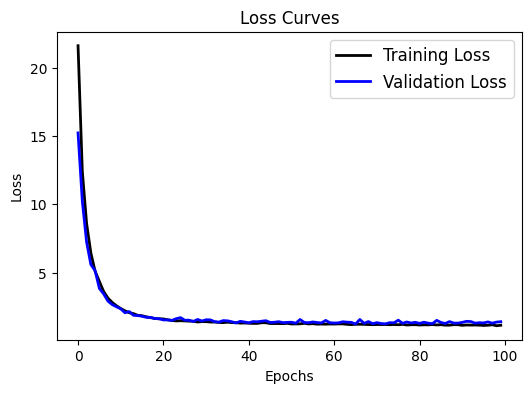

In [17]:
# Plotting the loss curve
plt.figure(figsize=[6, 4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

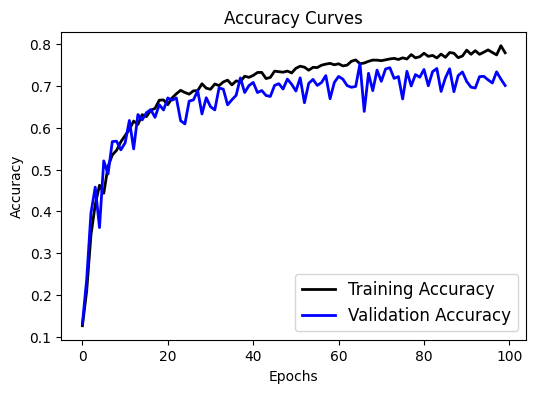

In [18]:
# Plotting the accuracy curve
plt.figure(figsize=[6, 4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

### Saving model to file

In [19]:
model.save("models/cifar10_test_model_L_v1.0.1.keras")